# Homework 3: Visualizing Data with Movies

Name: Danny Matlob

Date: 9/12/2024

#### Overview
In this homework, you'll create a movie visualization of a model parameter such as temperature, salinity, velocity, or any other field which may be of interest to you. 

As an example, I've provided a movie of circulation in the Equatorial Pacific from the NASA ECCO Version 5 State Estimate. For the purposes of this visualization, I subsetted the Equatorial Pacific is the region between 155-75$^{\circ}$W and $\pm$20$^{\circ}$N.

#### Import Modules
Import the modules required to access data from netCDF files, plot it, and stitch panels together into a movie:

In [1]:
# import modules here
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import moviepy.video.io.ImageSequenceClip

## Part 1: Download Data
To begin this exercise, download all of the available data for your variable of interest over the timespan of interest.

For the example provided, I've used daily sea surface temperature data for a given year (2015) from the ECCO Version 5 Alpha output [HERE](https://ecco.jpl.nasa.gov/drive/files/Version5/Alpha/latlon_daily/SST.nc).

To obtain your data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes. Be sure to edit the fields to obtain the correct data.

In [2]:
# define the path to the data folder
data_folder = 'F:\data'

## Part 2: Create a Single Plot of Sea Surface Temperature
Before making a movie, its useful to fine tune a single plot to get the details right. Once you've got your plot lookin' good, you can loop through all of the data to generate the panels of your movie.

Here, make a plot of one variable field. 

Begin by reading in the longitude, latitude, and SST fields from the netCDF file:

In [3]:
# read in the data
sst_file = os.path.join(data_folder,'ECCO','Version5','Alpha',
                          'latlon_daily','SST','SST_20150101.nc')
ds = nc4.Dataset(sst_file)
# ds
lon = ds.variables['LONGITUDE_T'][:]
lat = ds.variables['LATITUDE_T'][:] 
sst = ds.variables['SST'][:]
print(ds)
# Close the dataset
ds.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    description: ECCO LLC270 daily average
    dimensions(sizes): TIME(1), LATITUDE_T(720), LONGITUDE_T(1440)
    variables(dimensions): float32 TIME(TIME), float32 LATITUDE_T(LATITUDE_T), float32 LONGITUDE_T(LONGITUDE_T), float32 SST(TIME, LATITUDE_T, LONGITUDE_T)
    groups: 


C:\Users\DannyPC\AppData\Local\Temp\ipykernel_3104\2089202330.py:8: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  sst = ds.variables['SST'][:]


Next, find the locations of the longitude and latitude bounds within the global grid for your region of interest:

In [4]:
# define the longitude/latitude bounds
min_lon = -179.9
max_lon = 179.9
min_lat = -89.9
max_lat = 89.9

# compute the min/max row/col in the data grid
min_row = int(((min_lon + 180) / 360) * len(lon))
max_row = int(((max_lon + 180) / 360) * len(lon))
min_col = int(((min_lat + 90) / 180) * len(lat))
max_col = int(((max_lat + 90) / 180) * len(lat))

print("mn_row", min_row)
print("mx_row", max_row)
print("mn_col", min_col)
print("mx_col", max_col)

mn_row 0
mx_row 1439
mn_col 0
mx_col 719


Use the row and column bounds to subset the longitude, latitude, and your variable:

In [5]:
# subset the data
lon_subset = lon[min_row:max_row]
lat_subset = lat[min_col:max_col]
sst_subset = sst[0, min_col:max_col, min_row:max_row]

Finally, make a plot with your subsetted data. For the plot specification, you can use any colormap, data range, and format as you like.

For my example, I find that the temperature plot looks nice with a figure size of (8,4), a turbo colormap, and a data range of 20-31. However, you are encouraged to format your plot to your tastes.

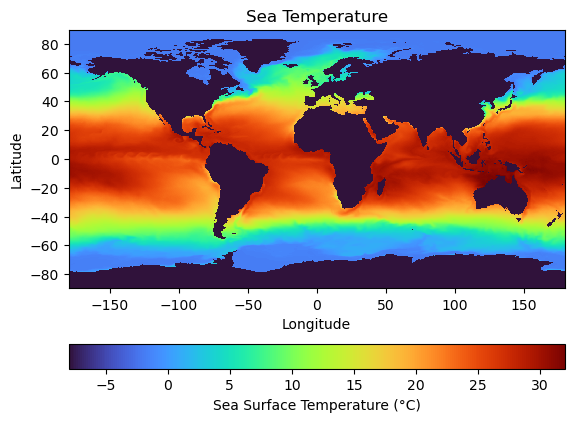

In [6]:
# make your figure here
fig = plt.figure()

# plot the temperature
plt.pcolormesh(lon_subset, lat_subset, sst_subset, vmin=-8, vmax=32, cmap='turbo')
colorbar = plt.colorbar(orientation = 'horizontal')
colorbar.set_label('Sea Surface Temperature (°C)')  # Adjust units if needed

# format the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sea Temperature')
plt.show()

## Part 3: Formulate a Plotting Function
When you are happy with your plot, make your code into a function that will take the year, month, and day as inputs, and output the figure into a given directory. 

In [7]:
def plot_panel(year,month,day):
    year_str = str(year)
    month_str = str(month).zfill(2)  # Add leading 0 if necessary
    day_str = str(day).zfill(2)  # Add leading 0 if necessary
    file_path = "./frames/temperature_" + year_str + month_str + day_str + ".png"
    
    if (os.path.exists("./frames/temperature_" + year_str + month_str + day_str + ".png")):
        print("Frame: ", year_str, " ", month_str, " ", day_str, " complete")
        return file_path
    
    filename = "SST_" + year_str + month_str + day_str + ".nc"
    print(filename)
    # fill in your function here
    sst_file = os.path.join(data_folder,'ECCO','Version5','Alpha', 'latlon_daily','SST',filename)
    ds = nc4.Dataset(sst_file)
    # ds
    lon = ds.variables['LONGITUDE_T'][:]
    lat = ds.variables['LATITUDE_T'][:] 
    sst = ds.variables['SST'][:]
    # Close the dataset
    ds.close()

    lon_subset = lon[min_row:max_row]
    lat_subset = lat[min_col:max_col]
    sst_subset = sst[0, min_col:max_col, min_row:max_row]

    # make your figure here
    fig = plt.figure()
    
    # plot the temperature
    plt.pcolormesh(lon_subset, lat_subset, sst_subset, vmin=-8, vmax=32, cmap='turbo')
    colorbar = plt.colorbar(orientation = 'horizontal')
    colorbar.set_label('Sea Surface Temperature (°C)')  # Adjust units if needed

    file_path = "./frames/temperature_" + year_str + month_str + day_str + ".png"
    
    # format the axes
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Sea Temperature ' + month_str + "/" + day_str + "/" + year_str)
    plt.savefig(file_path)
    plt.close(fig)
    print("Frame: ", year_str, " ", month_str, " ", day_str, " complete")
    return file_path

Once the function is complete, use it to loop through all of the data to make a plot for each day of the year. The following lines of code will form the panels of a data visualization movie when using daily data. If you are using monthly data, update accordingly:

In [8]:
# loop through the data and make a plot for each day
file_path_list = []
year = 2015
for month in range(1,13):
    if month in [1,3,5,7,8,10,12]:
        n_days = 31
    elif month in [4,6,9,11]:
        n_days = 30
    else:
        if year%4==0:
            n_days = 29
        else:
            n_days = 28
    for day in range(1,n_days+1):
        path = plot_panel(year,month,day)
        file_path_list.append(path)

SST_20150101.nc


C:\Users\DannyPC\AppData\Local\Temp\ipykernel_3104\344231597.py:19: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  sst = ds.variables['SST'][:]


Frame:  2015   01   01  complete
SST_20150102.nc
Frame:  2015   01   02  complete
SST_20150103.nc
Frame:  2015   01   03  complete
SST_20150104.nc
Frame:  2015   01   04  complete
SST_20150105.nc
Frame:  2015   01   05  complete
SST_20150106.nc
Frame:  2015   01   06  complete
SST_20150107.nc
Frame:  2015   01   07  complete
SST_20150108.nc
Frame:  2015   01   08  complete
SST_20150109.nc
Frame:  2015   01   09  complete
SST_20150110.nc
Frame:  2015   01   10  complete
SST_20150111.nc
Frame:  2015   01   11  complete
SST_20150112.nc
Frame:  2015   01   12  complete
SST_20150113.nc
Frame:  2015   01   13  complete
SST_20150114.nc
Frame:  2015   01   14  complete
SST_20150115.nc
Frame:  2015   01   15  complete
SST_20150116.nc
Frame:  2015   01   16  complete
SST_20150117.nc
Frame:  2015   01   17  complete
SST_20150118.nc
Frame:  2015   01   18  complete
SST_20150119.nc
Frame:  2015   01   19  complete
SST_20150120.nc
Frame:  2015   01   20  complete
SST_20150121.nc
Frame:  2015   01   

## Part 4: Compile Panels into a Movie
After creating all of the panels, stitch them together into a movie using moviepy:

In [9]:
# set the frames per second
fps = 20

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_path_list, fps=fps)

# write the video to a file
clip.write_videofile('C:\Classes\CS_185C\Homework\Homework_3\movies\worldTemps2015.mp4')


Moviepy - Building video C:\Classes\CS_185C\Homework\Homework_3\movies\worldTemps2015.mp4.
Moviepy - Writing video C:\Classes\CS_185C\Homework\Homework_3\movies\worldTemps2015.mp4



Moviepy - Done !
Moviepy - video ready C:\Classes\CS_185C\Homework\Homework_3\movies\worldTemps2015.mp4


## Part 5: Interpret Features in the Movie
A movie gives a good visualization of the physical processes occurring in a model. Describe one feature you see in the movie and relate it to an oceanographic feature. It could be a feature discussed in class or another feature you noticed and researched on your own.

Answer: This movie once again confirms and gives a cool visualization of the Gyres that occur in the ocean. The colder water looks like its getting sucked up along the west coasts of South America and Africa into the hotter water near the equator.